<a href="https://colab.research.google.com/github/manulthanura/WeatherApp/blob/master/Spam_Classification_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Spam Classification using NLP

### Step 01 - Reading Data & Visualization

Import modules

In [6]:
import pandas as pd
import nltk

Read Dataset

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Spam Classification using NLP/spam.csv", encoding="latin-1")

Read Dataset

Read Dataset

Read Dataset

In [8]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [11]:
df.rename(columns={'v1':'class','v2':'sms'},inplace=True)
df.sample(5)

,class,sms
806,ham,"sure, but make sure he knows we ain't smokin yet"
2486,ham,I dont thnk its a wrong calling between us
170,ham,"Sir, I need AXIS BANK account no and bank addr..."
3951,ham,Me hungry buy some food good lei... But mum n ...
1397,ham,Then we wait 4 u lor... No need 2 feel bad lar...


In [12]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516  Go until jurong point, crazy.. Available only ...    1
spam    653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

Data Visualization

In [15]:
df["Length"] = df["sms"].apply(len)

<ipython-input-15-6593e74a92d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Length"] = df["sms"].apply(len)


In [16]:
df.head(2)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

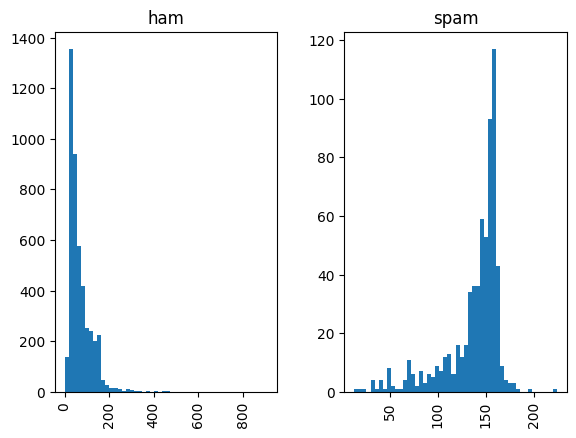

In [17]:
df.hist(column='Length', by='class', bins=50)

## Step 02 - Preprocessing

In [18]:
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
df.head(5)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Preprocessing Tasks:

*   Lower case
*   Tokenization
*   Removing specail characters
*   Removing stop word punctuation
*   Stemming

In [20]:
import string

def clean_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [21]:
df['sms_cleaned'] = df['sms'].apply(clean_text)

In [22]:
df.head(5)

,class,sms,Length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


### Step 03 - Feature Extraction

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
from nltk.parse.corenlp import transform
tf_vec = TfidfVectorizer(max_features=3000)
X = tf_vec.fit_transform(df['sms_cleaned']).toarray()

In [25]:
X.shape

(5169, 3000)

In [26]:
Y = df['class'].values

### Step 04 - Learning

In [27]:
from scipy.sparse import random
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [28]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [29]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9709864603481625
